In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df_tiki = pd.read_csv('tiki_trans.csv', index_col=0)
df_shopee = pd.read_csv('shopee_trans.csv', index_col=0)
df_sendo = pd.read_csv('sendo_trans.csv', index_col=0)
df_lazada = pd.read_csv('lazada_trans.csv', index_col=0)
df_tgdd = pd.read_csv('tgdd_trans.csv', index_col=0)

In [33]:
df_ecom = pd.concat([df_tiki, df_shopee, df_sendo, df_lazada, df_tgdd], axis=1, join='inner')
df_ecom.columns = ['Tiki', 'Shopee', 'Sendo', 'Lazada', 'TGDD']
df_ecom.index = pd.to_datetime(df_ecom.index)
df_ecom = df_ecom.resample('D').mean()
df_ecom

,Tiki,Shopee,Sendo,Lazada,TGDD
2016-12-01,39208,2776,137639,219945,575176
2016-12-02,45395,2499,188124,151591,416605
2016-12-03,26332,1954,91043,176054,552117
2016-12-04,40805,2431,175948,239613,570132
2016-12-05,33590,2975,112874,259489,330156
...,...,...,...,...,...
2021-09-26,194681,1389701,139008,253059,1499709
2021-09-27,208145,918495,137086,232647,1041605
2021-09-28,263037,583146,108677,257854,1256190
2021-09-29,177575,991591,121347,154003,1120203


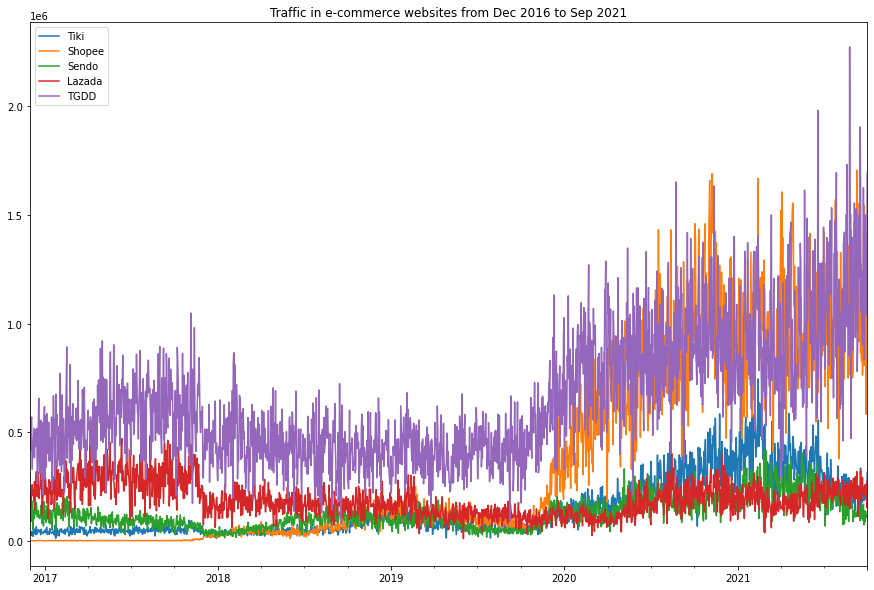

In [34]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 10)
df_ecom.plot()
plt.title('Traffic in e-commerce websites from Dec 2016 to Sep 2021')
plt.show()

In [35]:
df_ecom['Total'] = df_ecom.sum(axis=1)

Text(0.5, 1.0, 'Traffic in e-commerce websites from Dec 2016 to Sep 2021')

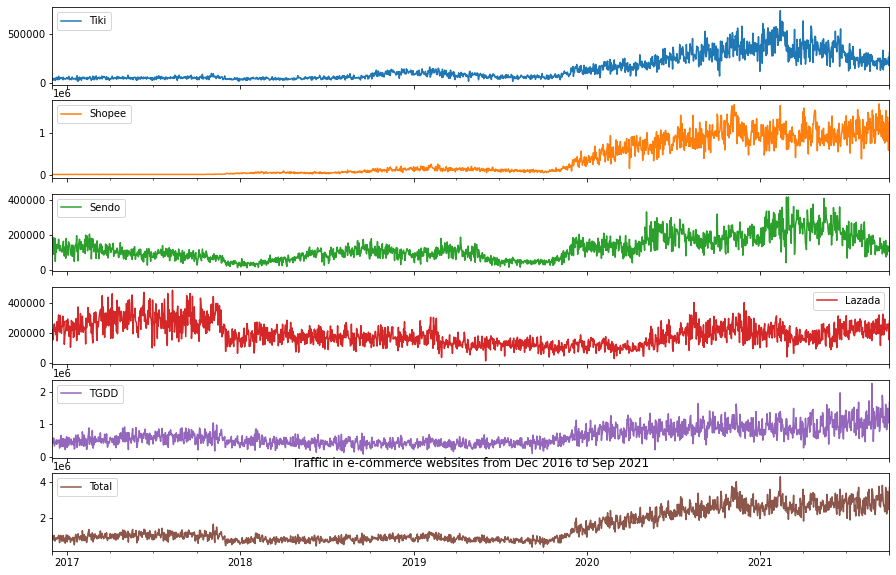

In [36]:
df_ecom.plot(subplots=True)
plt.title('Traffic in e-commerce websites from Dec 2016 to Sep 2021')

In [37]:
df_ecom.describe()

,Tiki,Shopee,Sendo,Lazada,TGDD,Total
count,1765.000000,1.765000e+03,1765.000000,1765.000000,1.765000e+03,1.765000e+03
mean,143674.422663,3.647928e+05,125678.257790,189663.146176,6.413586e+05,1.465167e+06
std,130591.433636,4.374999e+05,69143.274987,77028.632926,2.933419e+05,8.445411e+05
min,13922.000000,6.150000e+02,15641.000000,11469.000000,7.933000e+04,3.670540e+05
25%,49925.000000,3.271500e+04,74760.000000,131248.000000,4.225660e+05,8.162840e+05
50%,79036.000000,1.113210e+05,111691.000000,177473.000000,5.665490e+05,1.036581e+06
75%,212314.000000,7.450140e+05,161727.000000,236250.000000,8.117140e+05,2.222032e+06
max,745747.000000,1.705466e+06,416150.000000,485306.000000,2.271648e+06,4.292455e+06


## First analysis: Define Secular Trend in Time Series Data

1. Least-Squared Method:
- Apply for linear trend data.
- Must be done with the assumption that the data has only trend component.

In [38]:
X = np.arange(len(df_ecom))
y = df_ecom['Tiki']

mean_X = X.mean()
mean_y = y.mean()
        
Sxy = np.sum((X - mean_X) * (y - mean_y), axis=0)
Sxx = np.sum(np.power(X - mean_X, 2), axis=0)

slope = Sxy / Sxx
intercept = mean_y - slope * mean_X

slope, intercept

(199.91715682535434, -32652.50965707301)

In [39]:
def least_squared(X, y):
    mean_X = X.mean()
    mean_y = y.mean()

    Sxy = np.sum((X - mean_X) * (y - mean_y), axis=0)
    Sxx = np.sum(np.power(X - mean_X, 2), axis=0)

    slope = Sxy / Sxx
    intercept = mean_y - slope * mean_X
    
    print(slope, intercept)
    
    mpl.rcParams['figure.figsize'] = (15, 4)
    plt.plot(X, y, label='Actual Data')
    plt.plot(X, slope * X + intercept, label='Trend Line')
    plt.show()

199.91715682535434 -32652.50965707301


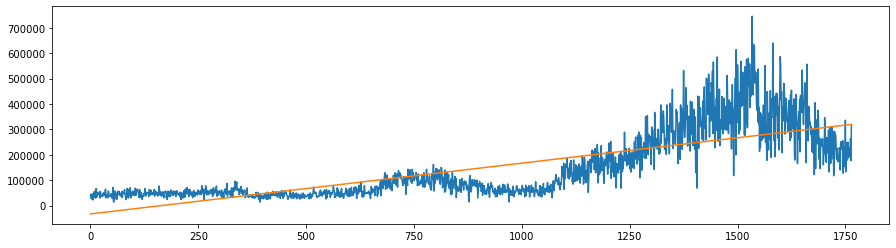

733.5471325849356 -282195.74884359597


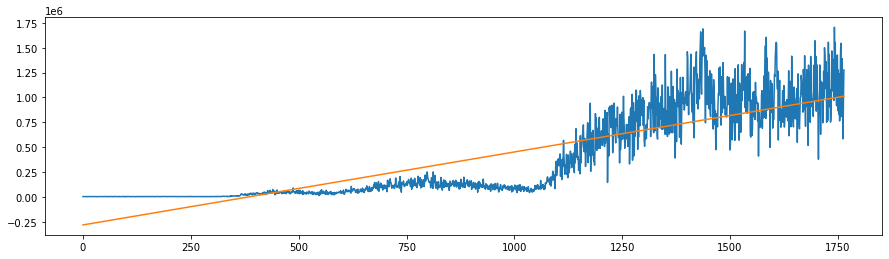

-46.36253450122265 230554.90160571577


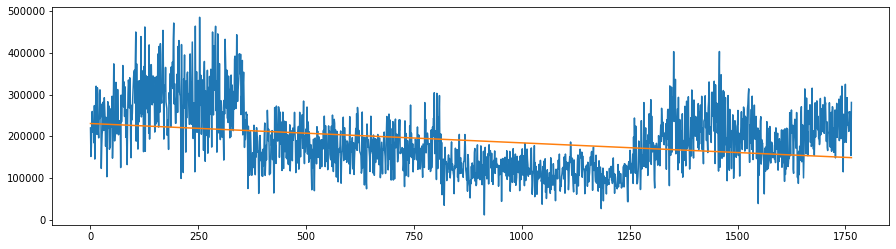

80.66813579287518 54528.96202105236


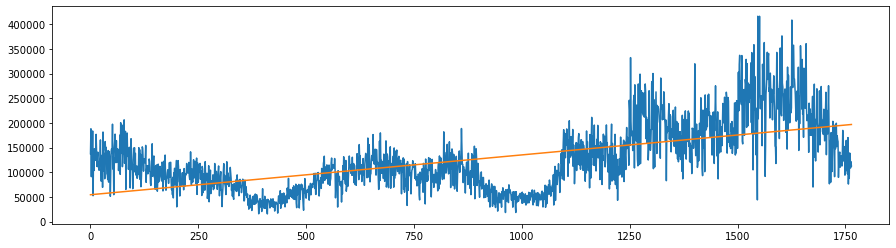

347.6129650327884 334763.9263141685


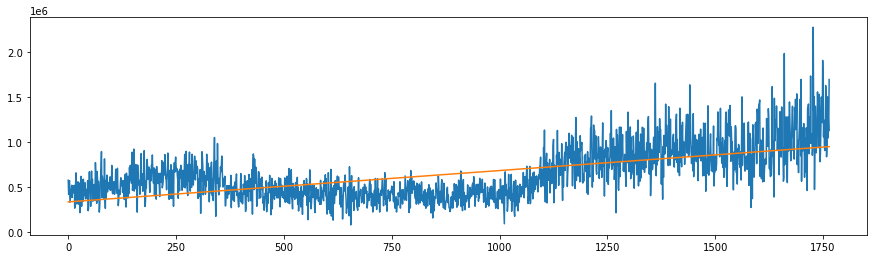

1315.3828557347308 304999.5314402676


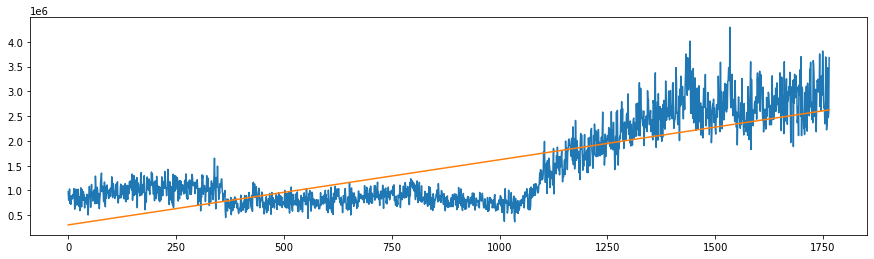

In [40]:
least_squared(np.arange(len(df_ecom)), df_ecom['Tiki'])
least_squared(np.arange(len(df_ecom)), df_ecom['Shopee'])
least_squared(np.arange(len(df_ecom)), df_ecom['Lazada'])
least_squared(np.arange(len(df_ecom)), df_ecom['Sendo'])
least_squared(np.arange(len(df_ecom)), df_ecom['TGDD'])
least_squared(np.arange(len(df_ecom)), df_ecom['Total'])

245.8801549369361 208575.11476917058


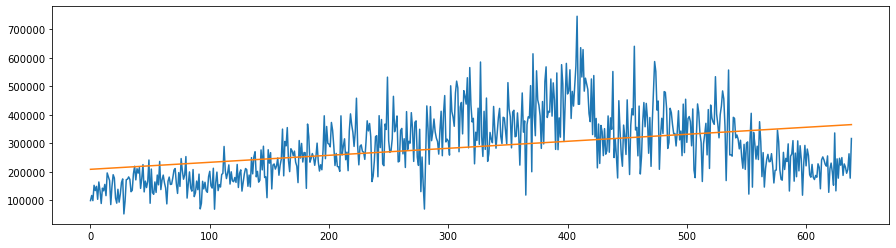

894.8398556963516 604982.7918231612


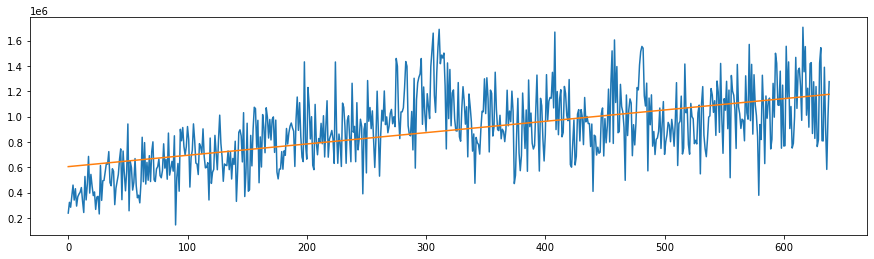

167.01707410739252 130145.03536287168


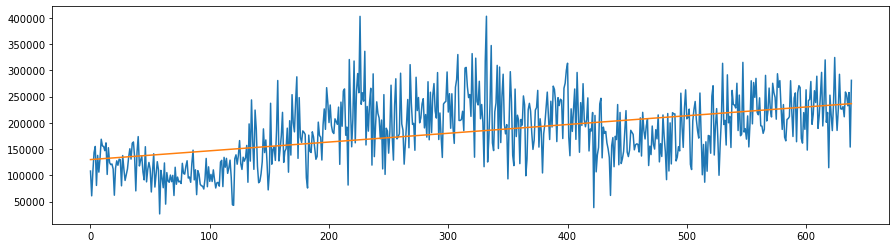

110.44121981102919 156073.42771909235


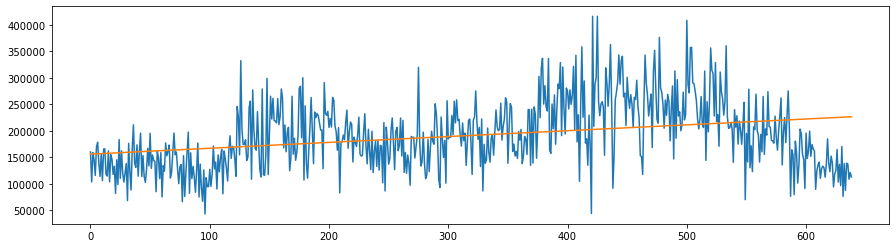

545.1727368849986 751325.7435690532


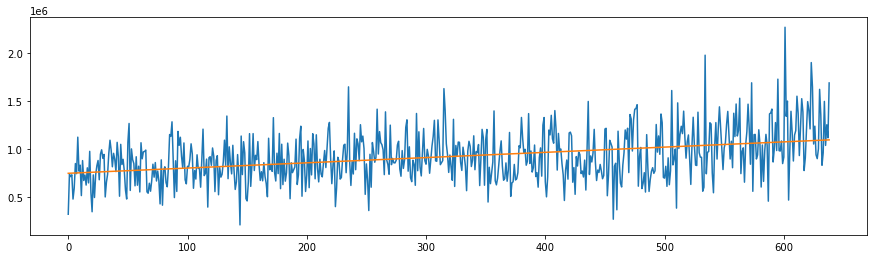

1963.351041436708 1851102.113243349


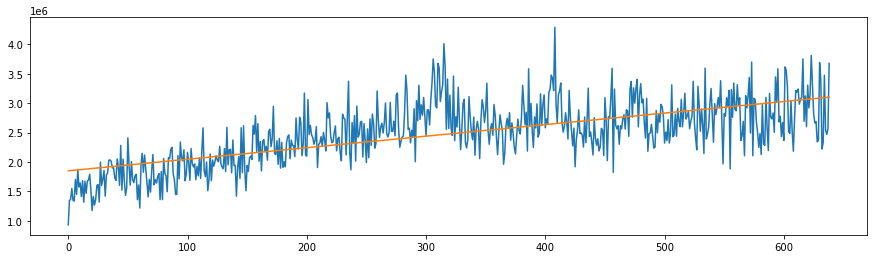

In [41]:
least_squared(np.arange(len(df_ecom['2020':])), df_ecom['2020':]['Tiki'])
least_squared(np.arange(len(df_ecom['2020':])), df_ecom['2020':]['Shopee'])
least_squared(np.arange(len(df_ecom['2020':])), df_ecom['2020':]['Lazada'])
least_squared(np.arange(len(df_ecom['2020':])), df_ecom['2020':]['Sendo'])
least_squared(np.arange(len(df_ecom['2020':])), df_ecom['2020':]['TGDD'])
least_squared(np.arange(len(df_ecom['2020':])), df_ecom['2020':]['Total'])

## Percentages of yearly traffic per month

In [42]:
df_ecom['day_of_week'] = df_ecom.index.day_of_week
df_ecom

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week
2016-12-01,39208,2776,137639,219945,575176,974744,3
2016-12-02,45395,2499,188124,151591,416605,804214,4
2016-12-03,26332,1954,91043,176054,552117,847500,5
2016-12-04,40805,2431,175948,239613,570132,1028929,6
2016-12-05,33590,2975,112874,259489,330156,739084,0
...,...,...,...,...,...,...,...
2021-09-26,194681,1389701,139008,253059,1499709,3476158,6
2021-09-27,208145,918495,137086,232647,1041605,2537978,0
2021-09-28,263037,583146,108677,257854,1256190,2468904,1
2021-09-29,177575,991591,121347,154003,1120203,2564719,2


In [50]:
df_ecom.groupby('day_of_week').mean()

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day
day_of_week,,,,,,,
0,143004.246032,354239.853175,125746.357143,187827.496032,629010.813492,1.439829e+06,15.686508
1,139870.464286,363559.503968,121085.083333,192708.273810,644922.801587,1.462146e+06,15.837302
2,145790.115079,373148.468254,123385.083333,192634.404762,652570.011905,1.487528e+06,15.750000
3,140310.110672,379471.667984,131225.229249,185645.529644,655579.300395,1.492232e+06,15.727273
4,145447.444444,357080.571429,126748.769841,190947.373016,645684.003968,1.465908e+06,15.706349
5,146379.789683,360157.448413,127461.138889,190178.091270,632735.833333,1.456912e+06,15.734127
6,144932.138889,365833.992063,124074.130952,187716.797619,628950.734127,1.451508e+06,15.646825


In [52]:
df_ecom.groupby('day_of_week').mean() / df_ecom.groupby('day_of_week').mean().sum(axis=0) * 100

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day
day_of_week,,,,,,,
0,14.218889,13.872764,14.293813,14.147280,14.010855,14.038806,14.249013
1,13.907298,14.237741,13.763957,14.514904,14.365285,14.256407,14.385988
2,14.495888,14.613265,14.025403,14.509340,14.535622,14.503890,14.306687
3,13.951012,14.860894,14.916606,13.982933,14.602653,14.549753,14.286042
4,14.461816,13.984013,14.407759,14.382271,14.382241,14.293088,14.267036
5,14.554519,14.104509,14.488735,14.324329,14.093828,14.205376,14.292268
6,14.410579,14.326815,14.103728,14.138943,14.009517,14.152680,14.212967


In [49]:
df_ecom['day'] = df_ecom.index.day
df_ecom

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week,day
2016-12-01,39208,2776,137639,219945,575176,974744,3,1
2016-12-02,45395,2499,188124,151591,416605,804214,4,2
2016-12-03,26332,1954,91043,176054,552117,847500,5,3
2016-12-04,40805,2431,175948,239613,570132,1028929,6,4
2016-12-05,33590,2975,112874,259489,330156,739084,0,5
...,...,...,...,...,...,...,...,...
2021-09-26,194681,1389701,139008,253059,1499709,3476158,6,26
2021-09-27,208145,918495,137086,232647,1041605,2537978,0,27
2021-09-28,263037,583146,108677,257854,1256190,2468904,1,28
2021-09-29,177575,991591,121347,154003,1120203,2564719,2,29


,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week
day,,,,,,,
1,3.122901,2.977083,3.123580,3.083975,2.978392,3.018350,3.300798
2,3.038686,3.253052,3.290053,3.053664,3.199250,3.185847,3.208079
3,3.042321,3.244038,3.207407,3.148366,3.287520,3.227787,3.245167
4,3.141956,3.138328,3.199739,3.085284,3.206236,3.166833,3.282254
5,3.032953,3.412930,3.315634,3.157435,3.208152,3.244580,3.189535
6,3.193697,3.353740,3.349649,3.294736,3.136359,3.234851,3.096816
7,3.073230,3.152350,3.100044,3.126024,3.214035,3.163718,3.263711
8,3.324572,3.471133,3.170646,3.178090,3.174946,3.263339,3.300798
9,3.344945,3.055182,3.178564,3.314851,3.181322,3.183022,3.208079


<AxesSubplot:xlabel='day'>

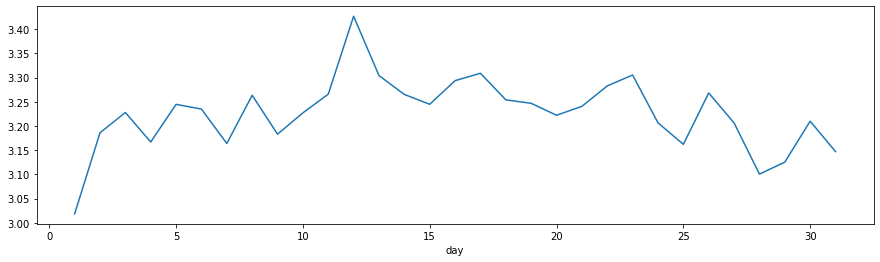

In [55]:
display(df_ecom.groupby('day').mean() / df_ecom.groupby('day').mean().sum(axis=0) * 100)
(df_ecom.groupby('day').mean() / df_ecom.groupby('day').mean().sum(axis=0) * 100)['Total'].plot()

In [60]:
df_month = df_ecom.resample('M').sum()
df_month['month'] = df_month.index.month
df_month.head()

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week,day,month
2016-12-31,1300523,80545,3953837,7174689,14284867,26794461,96,496,12
2017-01-31,1300523,80543,3953841,7174690,14284871,26794468,91,496,1
2017-02-28,1300524,80545,3953840,7174690,14284870,26794469,84,406,2
2017-03-31,1496852,86776,3573724,9045476,15786871,29989699,93,496,3
2017-04-30,1441006,84254,3319387,9188977,16048746,30082370,95,465,4


In [68]:
df_month[:'2020-01-01'].groupby('month').mean() / df_month[:'2020-01-01'].groupby('month').mean().sum(axis=0) * 100

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week,day
month,,,,,,,,
1,8.021974,7.631694,8.134154,8.154389,7.806560,7.917117,8.161401,8.644127
2,8.419491,8.408854,8.168523,8.488060,8.055825,8.212440,7.674153,7.075636
3,7.885481,7.437769,9.182318,8.725906,7.756805,8.095138,8.770461,8.644127
4,7.282336,7.547942,8.751383,8.693676,7.869654,8.072421,8.222307,8.103869
5,7.889860,7.224930,8.965688,8.641110,8.218576,8.289240,8.222307,8.644127
6,7.028840,6.631933,7.579543,8.744087,8.445110,8.193366,8.496384,8.103869
7,7.167615,6.129180,7.730584,8.386127,8.517646,8.142272,8.313666,8.644127
8,7.617829,6.839929,7.924473,8.485326,8.766385,8.400766,8.496384,8.644127
9,7.507496,6.614778,7.758450,8.230165,8.267364,8.035038,8.465931,8.103869


<AxesSubplot:xlabel='month'>

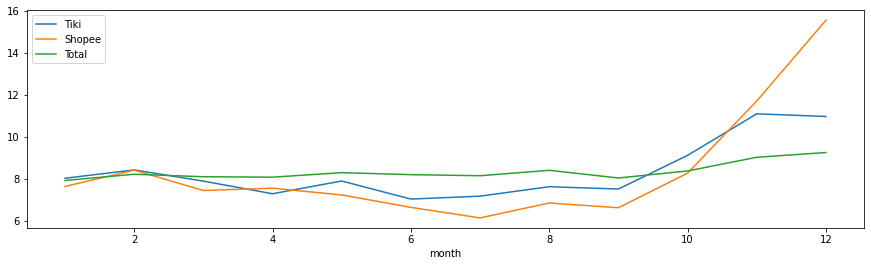

In [74]:
(df_month[:'2020-01-01'].groupby('month').mean() / df_month[:'2020-01-01'].groupby('month').mean().sum(axis=0) * 100)[['Tiki', 'Shopee', 'Total']].plot()

In [70]:
df_month.groupby('month').mean() / df_month.groupby('month').mean().sum(axis=0) * 100

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week,day
month,,,,,,,,
1,8.653963,6.897529,8.499228,7.931810,7.774022,7.724778,8.399142,8.635398
2,9.210071,7.595984,8.162211,7.870538,7.997693,8.014325,7.760077,7.169470
3,7.815498,7.702594,9.286042,7.691633,7.877084,7.924023,8.508696,8.635398
4,8.139539,8.998358,8.647187,7.586310,8.126436,8.319147,8.216552,8.095686
5,8.406271,8.095222,9.777977,8.195483,8.360352,8.398701,8.472178,8.635398
6,8.657599,8.707035,9.079167,8.627153,8.593784,8.674070,8.234811,8.095686
7,8.125412,9.781842,8.629948,8.847577,8.995608,9.055356,8.435660,8.635398
8,8.152166,9.610688,8.035480,9.209550,9.253573,9.124433,8.490437,8.635398
9,8.165654,10.048929,7.129896,8.767073,9.340954,9.138204,8.289588,8.095686


<AxesSubplot:xlabel='month'>

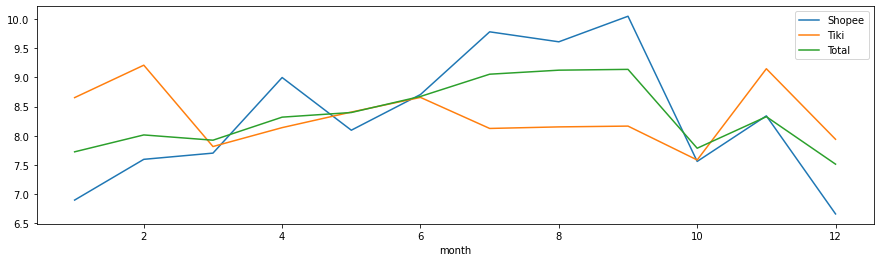

In [72]:
(df_month.groupby('month').mean() / df_month.groupby('month').mean().sum(axis=0) * 100)[['Shopee', 'Tiki', 'Total']].plot()

# Trend discovery using monthly data

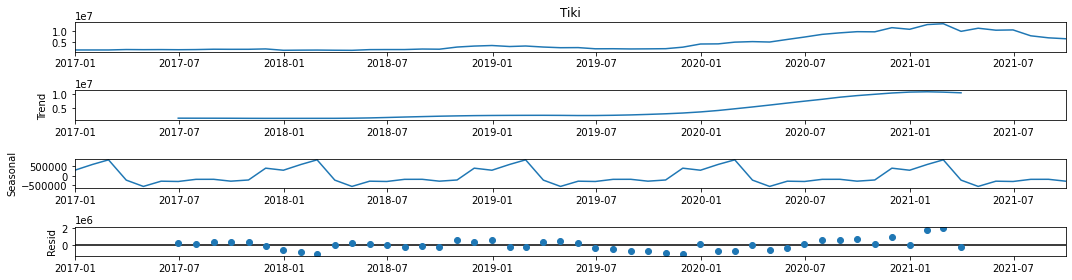

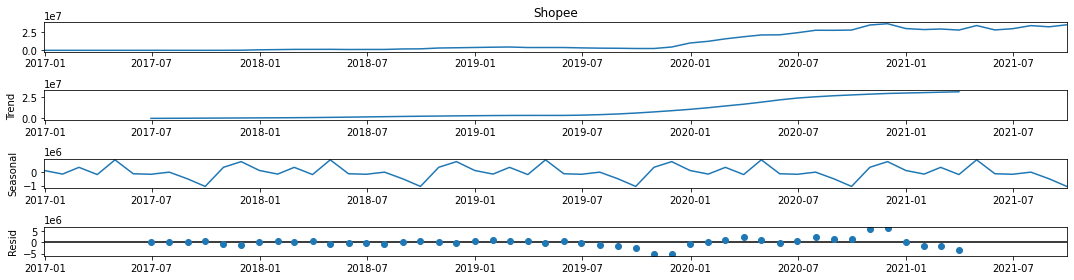

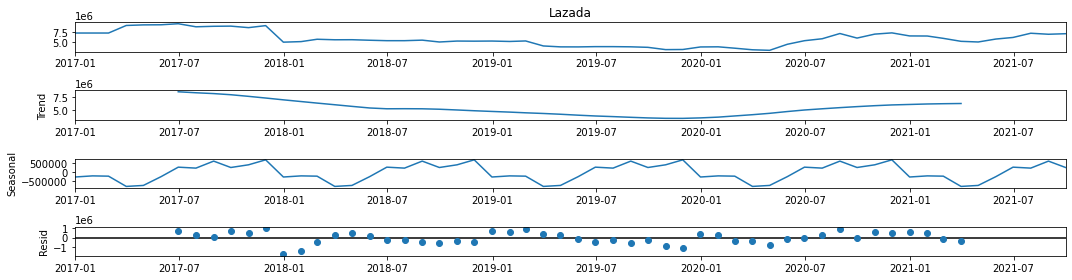

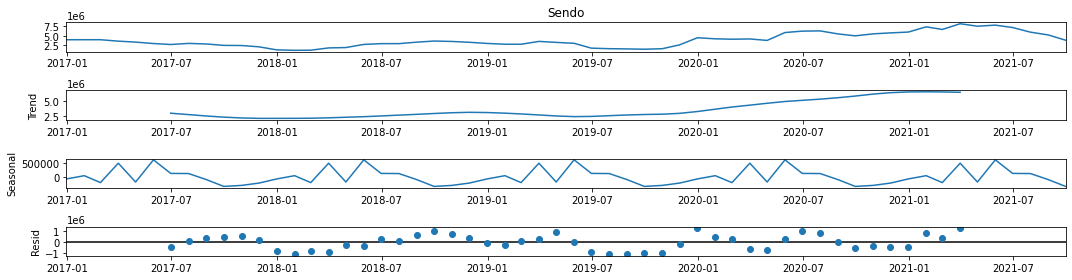

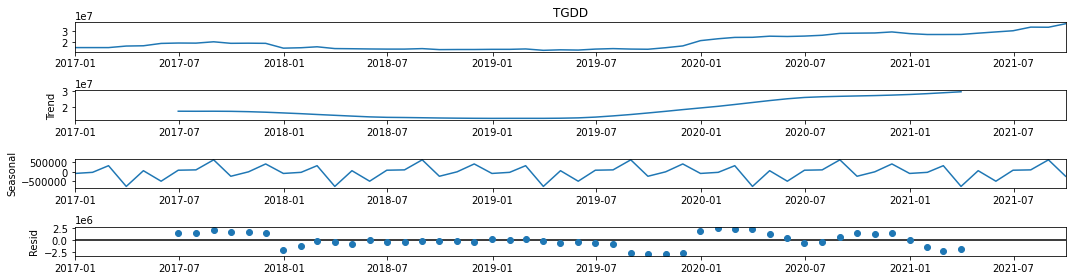

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(df_month['Tiki']).plot()
seasonal_decompose(df_month['Shopee']).plot()
seasonal_decompose(df_month['Lazada']).plot()
seasonal_decompose(df_month['Sendo']).plot()
seasonal_decompose(df_month['TGDD']).plot()
plt.show()